# 1 Introduction

## 1.1 Context

The goal of this project is to explore various machine learning techniques applied to the fused dataset FUSION.csv, which combines two datasets:

kc_house_data.csv : Contains information about houses (price, square footage, number of bedrooms, location, etc.). <br>
MORTGAGE30US.csv : Provides data on average 30-year mortgage rates in the United States.

The final dataset (FUSION.csv) consists of 4117 observations with 22 columns , obtained by merging these two sources using the date as the common key. The dataset has been cleaned, normalized, and enriched with derived features such as:

age: Current year minus the year of construction.<br>
sqft_grade_interaction: Interaction between living space (sqft_living) and the grade of the house.

## 1.2 Objectives

The main objectives of this project are:

- To apply a clustering algorithm (DBSCAN ) to the dataset after dimensionality reduction.
- To analyze the results of the clustering, interpret the clusters, and understand how hyperparameter changes impact the interpretation.
- For the final project, we will choose one technical problem (classification, regression, clustering, or dimensionality reduction) and compare four models addressing the same problem using different algorithm families (e.g., partition-based vs. density-based clustering, linear vs. non-linear regression, etc.).
- We will optimize the hyperparameters of the algorithms using two techniques: Grid Search and Random Search (or Bayesian Optimization).

## 1.3 Methodology

To achieve these objectives, we will follow these steps:

### Data Preparation :
- Load and inspect the quality of the dataset.
- Normalize/standardize the data for better performance of the algorithms.
### Dimensionality Reduction :
- Choose a dimensionality reduction technique to reduce the complexity of the data while preserving meaningful patterns.
- Justify the choice based on the nature of the dataset and the problem at hand.
### Clustering with DBSCAN :
- Use DBSCAN to identify natural groupings in the reduced-dimensional data.
- Analyze the clusters and their significance in relation to the original features.
### Hyperparameter Impact :
- Explore the impact of hyperparameters (eps and min_samples) on DBSCAN's performance.
- Visualize the impact of the key hyperparameters (eps and min_samples) on the clustering results
### Final Project: Comparison of Four Models :
- Select one technical problem (classification, regression, clustering, or dimensionality reduction).
- Implement four models from different algorithm families to solve the chosen problem.
- Evaluate and compare their performances, explaining why some models may be better suited than others.

## 1.4 Importance of the Project

This project aims to deepen our understanding of several key machine learning concepts:

- Data preprocessing and cleaning.
- Dimensionality reduction techniques like PCA and UMAP.
- Clustering algorithms such as DBSCAN.
- Hyperparameter optimization methods (Grid Search and Random Search). 

It also provides an opportunity to learn how to interpret model results and choose the best approach for a given problem.

# 2 Data Preparation

Before proceeding with analysis, it is essential to verify the quality of the dataset by checking for missing values and duplicates.

In [2]:
# Library Import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [3]:
# Loading the merged dataset
df = pd.read_csv('FUSION.csv')

In [4]:
# Display first lines
print("Aperçu du dataset :")
display(df.head())

Aperçu du dataset :


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,MORTGAGE30US
0,2008000270,2015-01-15,291850.0,3,1.5,1060,9711,1.0,0,0,...,1060,0,1963,0,98198,47.4095,-122.315,1650,9711,3.66
1,3793500160,2015-03-12,323000.0,3,2.5,1890,6560,2.0,0,0,...,1890,0,2003,0,98038,47.3684,-122.031,2390,7570,3.86
2,1175000570,2015-03-12,530000.0,5,2.0,1810,4850,1.5,0,0,...,1810,0,1900,0,98107,47.6700,-122.394,1360,4850,3.86
3,1875500060,2014-07-31,395000.0,3,2.0,1890,14040,2.0,0,0,...,1890,0,1994,0,98019,47.7277,-121.962,1890,14018,4.12
4,6865200140,2014-05-29,485000.0,4,1.0,1600,4300,1.5,0,0,...,1600,0,1916,0,98103,47.6648,-122.343,1610,4300,4.12


In [5]:
# shape and columns
print(f"Nombre de lignes : {df.shape[0]}")
print(f"Nombre de colonnes : {df.shape[1]}")
print("Colonnes disponibles :")
display(df.columns)

Nombre de lignes : 4117
Nombre de colonnes : 22
Colonnes disponibles :


Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'MORTGAGE30US'],
      dtype='object')

In [6]:
# checking missing values
print("\nValeurs manquantes :")
display(df.isnull().sum())


Valeurs manquantes :


id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
MORTGAGE30US     0
dtype: int64

Missing values are checked using isnull().sum() to ensure there are no gaps in the data.

In [7]:
# checking duplicated data
print(f"\nNombre de doublons : {df.duplicated().sum()}")


Nombre de doublons : 0


Duplicates are verified using duplicated().sum() to avoid redundancy in the dataset.

In [8]:
# Ajout de caractéristiques dérivées 
df['age'] = 2024 - df['yr_built']
df['sqft_grade_interaction'] = df['sqft_living'] * df['grade']

- age: Calculated as the difference between the current year (2024) and the year the house was built (yr_built). This helps capture the age of the property. 
- sqft_grade_interaction: Represents the interaction between living space (sqft_living) and the grade of the house (grade). This feature may help identify patterns related to property quality.

In [9]:
# Selecting relevant columns
features = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 
            'floors', 'waterfront', 'view', 'condition', 'grade', 
            'yr_built', 'yr_renovated', 'lat', 'long', 'MORTGAGE30US', 
            'age', 'sqft_grade_interaction']

df = df[features]

We select relevant features for clustering based on their potential impact on grouping patterns. These include:

- House-related features: price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition, grade. <br>
- Location-related features: lat, long. <br>
- Time-related features: yr_built, yr_renovated, age. <br>
- Interaction feature: sqft_grade_interaction (interaction between sqft_living and grade).

In [10]:
# Normalization
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[features])

# Conversion en DataFrame pour plus de lisibilité
df_scaled = pd.DataFrame(df_scaled, columns=features)

In [11]:
# Display normalized data
print("\nDonnées normalisées :")
display(df_scaled.head())


Données normalisées :


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,yr_renovated,lat,long,MORTGAGE30US,age,sqft_grade_interaction
0,-0.693801,-0.403908,-0.801577,-1.126662,-0.136014,-0.913608,-0.084225,-0.306105,-0.623815,-0.537939,-0.265699,-0.216903,-1.054429,-0.691774,-1.557282,0.265699,-0.924817
1,-0.603647,-0.403908,0.506297,-0.200188,-0.221663,0.945672,-0.084225,-0.306105,-0.623815,-0.537939,1.095699,-0.216903,-1.349135,1.330704,-0.546167,-1.095699,-0.339489
2,-0.004554,1.729369,-0.147640,-0.289487,-0.268143,0.016032,-0.084225,-0.306105,-0.623815,-0.537939,-2.409902,-0.216903,0.813476,-1.254365,-0.546167,2.409902,-0.395906
3,-0.395267,-0.403908,-0.147640,-0.200188,-0.018345,0.945672,-0.084225,-0.306105,-0.623815,-0.537939,0.789385,-0.216903,1.227212,1.822081,0.768283,-0.789385,-0.339489
4,-0.134791,0.662731,-1.455515,-0.523896,-0.283093,0.016032,-0.084225,-0.306105,0.889589,-0.537939,-1.865343,-0.216903,0.776190,-0.891173,0.768283,1.865343,-0.544001


Clustering algorithms like DBSCAN rely on distance metrics, so it is crucial to normalize the data to ensure all features contribute equally to the analysis <br>
Normalization ensures that features with larger scales (e.g., price, sqft_living) do not dominate the clustering process. <br>
The normalized data is converted back to a Pandas DataFrame for easier interpretation.

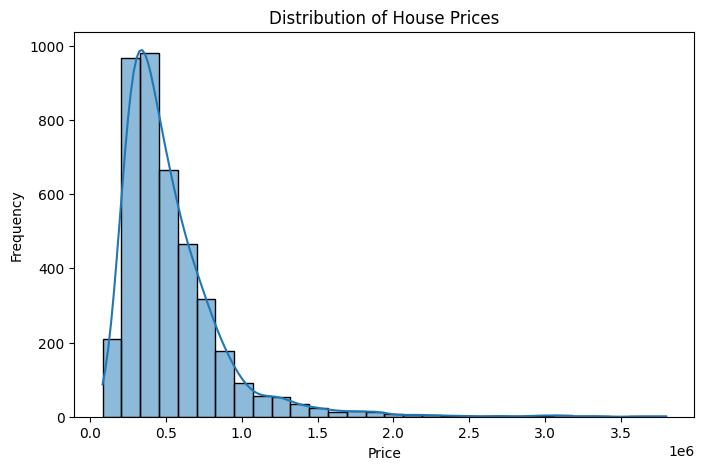

In [12]:
# Visualize the distribution of house prices
plt.figure(figsize=(8, 5))
sns.histplot(df['price'], kde=True, bins=30)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


- The majority of homes are priced between $300,000 and $500,000, which is the most common range.
- The distribution is skewed to the right, indicating the presence of a few luxury homes with much higher prices (up to about $3,800,000).
- The outliers on the right likely represent exceptional properties, such as villas or houses located in highly sought-after areas.

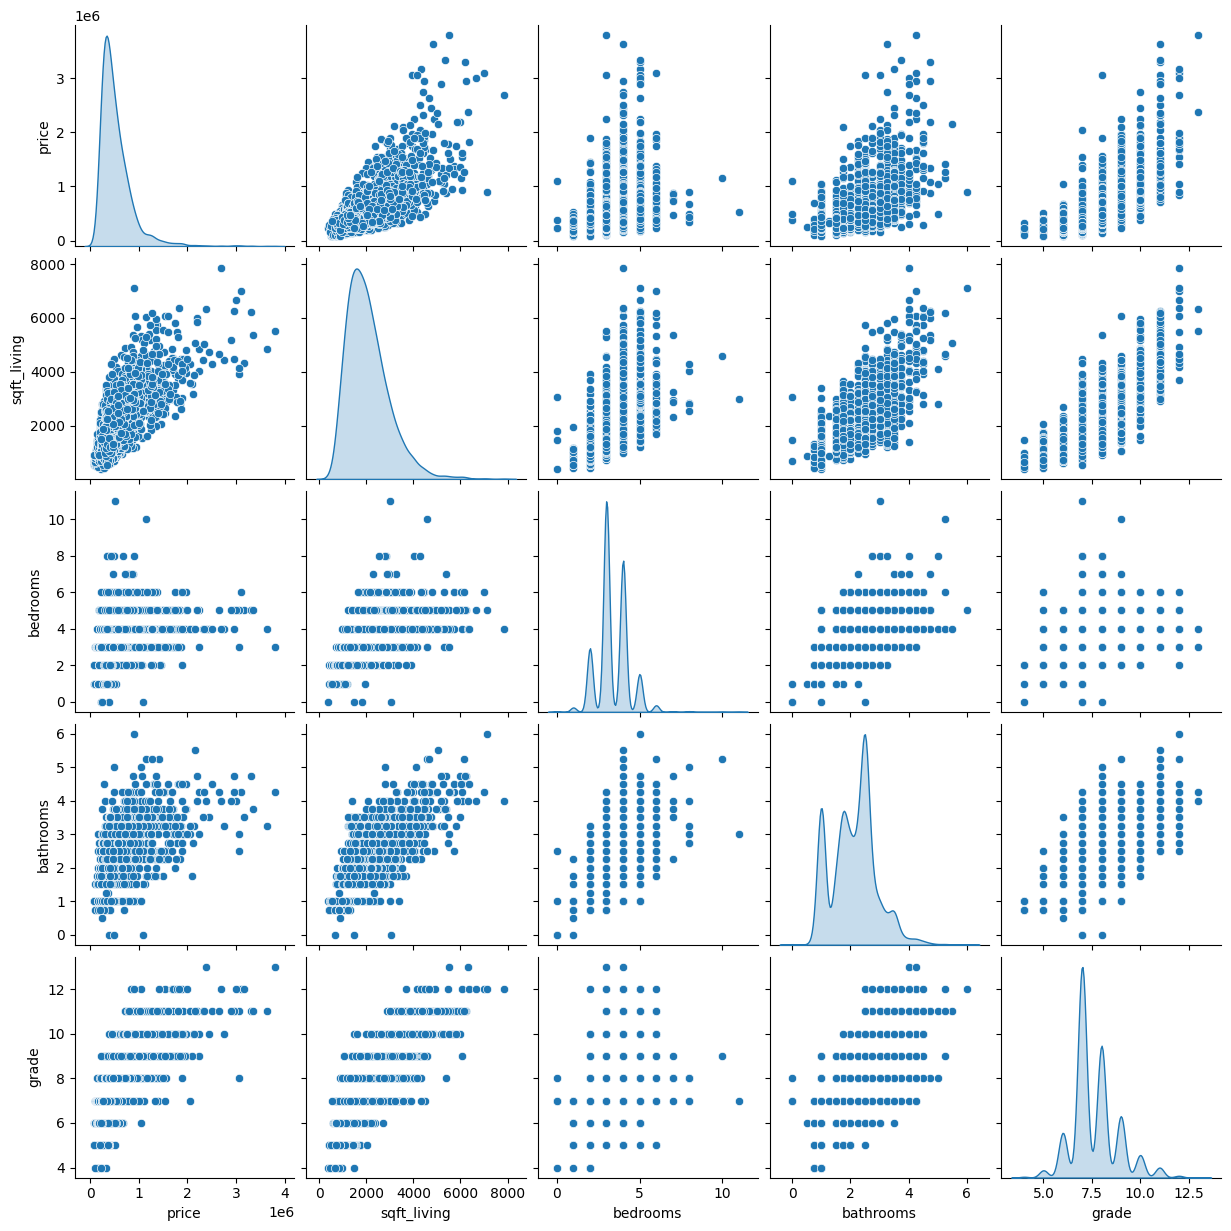

In [13]:
# Pairplot to visualize relationships between selected features
selected_features = ['price', 'sqft_living', 'bedrooms', 'bathrooms', 'grade']
sns.pairplot(df[selected_features], diag_kind='kde')
plt.show()

price vs sqft_living :
A strong positive correlation is visible between price and sqft_living. This means that larger homes are generally more expensive.

price vs bedrooms :
There is no obvious linear relationship between price and number of bedrooms. This can be explained by the fact that other factors (such as location or grade) also influence price.

price vs bathrooms :
A slight positive trend is observable, showing that homes with more bathrooms tend to cost more.

price vs grade :
A strong positive correlation exists between price and home grade. Homes with a better grade (quality of construction and finishes) are significantly more expensive.

Diagonal plots show the distribution of each individual variable. For example, sqft_living follows a normal distribution, while bedrooms is discrete.

A brief exploration of the dataset helps us understand its characteristics and distribution. <br>
At the end of this step, the dataset is ready for further analysis:

- Missing values and duplicates have been checked and confirmed absent.
- Derived features (age, sqft_grade_interaction) have been added to enrich the dataset.
- The data has been normalized to ensure consistent scales across features.

This preparation ensures that subsequent steps, such as dimensionality reduction and clustering, will yield meaningful results.

# 3 Dimensionality Reduction

## 3.1 Introduction

Dimension reduction aims to project data into a lower-dimensional space while preserving as much important information as possible. This step is crucial for:
- Reduce the complexity of the dataset.
- Eliminate noise and capture essential relationships between variables.
- Facilitate the visualization and interpretation of clusters.

In our case, we chose to use UMAP (Uniform Manifold Approximation and Projection) for several reasons:
- The "curse of dimensionality" problem: Distance-based algorithms, such as DBSCAN, suffer from degraded performance when the number of dimensions increases. This results in a loss of sensitivity to local distances, making it difficult to identify meaningful clusters.
- Advantages of UMAP: Unlike PCA, which captures only the directions of maximum (linear) variance, UMAP better preserves the complex and nonlinear local structures of the data. This makes it an ideal choice to identify natural groups in our dataset.


## 3.2 Initial Experiment

Before dimensionality reduction, we tried to apply DBSCAN directly on the raw data. Here is what we observed

In [14]:
# Tentative d'application de DBSCAN sur les données brutes
from sklearn.cluster import DBSCAN

dbscan_raw = DBSCAN(eps=0.5, min_samples=5)
clusters_raw = dbscan_raw.fit_predict(df_scaled)

# Compter le nombre de clusters et de points considérés comme bruit
num_clusters_raw = len(set(clusters_raw)) - (1 if -1 in clusters_raw else 0)
num_noise_raw = list(clusters_raw).count(-1)

print(f"Nombre de clusters après DBSCAN sur données brutes: {num_clusters_raw}")
print(f"Nombre de points considérés comme bruit: {num_noise_raw}")

Nombre de clusters après DBSCAN sur données brutes: 4
Nombre de points considérés comme bruit: 4093


Résultats : 

Nombre de clusters identifiés : 4 (après application de DBSCAN sur les données brutes). <br>
Nombre de points considérés comme bruit : 4093 (soit environ 99.4% des données).

Interprétation :

Ces résultats montrent que l'application directe de DBSCAN sur les données brutes conduit à une segmentation limitée et peu significative :

- Fort taux de bruit : Lorsque nous avons appliqué DBSCAN directement sur les données brutes avec les paramètres par défaut (eps=0.5 et min_samples=5), la majorité des observations (environ 99.4%) ont été classifiées comme bruit. Ce résultat montre que ces paramètres ne permettaient pas de capturer des groupements denses dans l'espace multidimensionnel initial. Cette expérience initiale confirme l'importance de réduire la dimensionalité avant d'appliquer DBSCAN, afin de faciliter la détection de clusters significatifs. Nous analyserons plus en détail dans la section suivante comment le choix des hyperparamètres (eps et min_samples) influence les résultats et leur interprétation.
- Impact de la haute dimensionalité : Le problème principal réside dans la "curse of dimensionality". Avec un grand nombre de dimensions, les distances entre les points deviennent moins significatives, rendant difficile l'identification de clusters denses.

En conséquence, DBSCAN considère la plupart des points comme isolés et donc comme du bruit.

Conclusion :

Les résultats obtenus avec DBSCAN sur les données brutes montrent clairement ses limitations dans un contexte à haute dimensionalité. Pour remédier à ce problème, il est essentiel de réduire la dimensionnalité des données avant d'appliquer l'algorithme. Cette étape permettra de capturer les relations essentielles entre les variables tout en simplifiant l'espace de recherche pour DBSCAN

## 3.3 Solution Adoptée

Pour remédier à ce problème, nous avons décidé de réduire la dimensionnalité avant d'appliquer DBSCAN. Après avoir testé différentes techniques (PCA et UMAP), nous avons opté pour UMAP pour les raisons suivantes :

Preservation des Structures Locales :
UMAP est capable de capturer des relations complexes et non linéaires entre les variables, ce qui est crucial pour identifier des clusters significatifs.<br>

Performances Supérieures :
Comparé à PCA, UMAP a produit des résultats plus granulaires et pertinents lors de nos expérimentations précédentes. <br>

Visualisation en 3D :
UMAP permet une projection en 3D qui facilite l'interprétation visuelle des clusters.

## 3.4 Implémentation de UMAP

In [15]:
# Importation de UMAP
import umap.umap_ as umap

# Réduction de dimension avec UMAP (3D)
umap_reducer = umap.UMAP(n_components=3, random_state=42)
df_umap = umap_reducer.fit_transform(df_scaled)

# Conversion en DataFrame pour facilité l'analyse
df_umap = pd.DataFrame(df_umap, columns=["UMAP_1", "UMAP_2", "UMAP_3"])

c:\Users\ousma\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\ousma\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


We chose n_components=3 to project the data into 3D space, making it easier to visualize while retaining enough information. <br>
The random_state=42 parameter ensures reproducibility of the results.

## 3.5 Visualization of Results and Analysis of Information Retained or Lost

In [16]:
df_umap

,UMAP_1,UMAP_2,UMAP_3
0,9.971899,12.671098,8.372854
1,10.444705,1.939079,10.051884
2,9.455112,12.080676,6.247085
3,11.944988,5.025126,9.861812
4,11.548579,9.836367,3.180422
...,...,...,...
4112,9.786391,3.839981,9.902029
4113,9.933907,0.080883,3.881516
4114,9.651025,12.623500,9.576875
4115,10.107936,3.816766,7.953895


In [17]:
# Visualize UMAP-reduced data in 3D
import plotly.express as px

fig = px.scatter_3d(df_umap, x="UMAP_1", y="UMAP_2", z="UMAP_3", 
                    title="Data Projection with UMAP (3D)", opacity=0.7)
fig.show()

La projection montre que les données se regroupent naturellement en plusieurs clusters distincts.<br>

#### Comparison with Original Data

Après avoir réduit la dimensionnalité avec UMAP, il est important de discuter des informations conservées ou perdues :

Informations Conservées : 
- UMAP conserve les structures locales des données, ce qui signifie que les similarités entre les points proches sont bien préservées.
- Certains clusters pourraient correspondre à des maisons similaires en termes de prix, superficie, ou localisation.<br>
- Les outliers (points isolés) pourraient représenter des maisons atypiques (luxueuses ou anciennes).

Informations Perdues :
- Bien que UMAP conserve les structures locales des données, certaines relations globales (comme celles liées aux variables zipcode ou yr_built) peuvent être atténuées. Cependant, dans notre cas, ces pertes sont minimes par rapport aux avantages apportés par la simplification de l'espace de recherche.

## 3.6 Conclusion

The UMAP dimensionality reduction technique successfully projects our high-dimensional dataset into a 3D space while preserving important local structures. This simplification will greatly enhance the performance of subsequent analyses, particularly clustering algorithms like DBSCAN. By reducing noise and focusing on meaningful patterns, UMAP ensures that the reduced dataset remains informative and interpretable.



# 4 Clustering with DBSCAN

Now that we have reduced the dimensionality of the data using UMAP, we can apply the DBSCAN (Density-Based Spatial Clustering of Applications with Noise) clustering algorithm.

## 4.1 Introduction with DBSCAN

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a density-based clustering algorithm that identifies clusters based on two key hyperparameters:

- eps : The maximum distance between two points for them to be considered neighbors. A smaller value would result in fewer connections between points, potentially leading to more noise.
- min_samples : The minimum number of points required to form a dense region (cluster). Increasing this value would make it harder for points to form clusters, resulting in fewer but denser clusters.

Key advantages of DBSCAN include:

- Arbitrary Shapes : It can identify clusters of arbitrary shapes, unlike algorithms like K-Means, which assume spherical clusters.
- Robustness to Outliers : Points that do not belong to any dense region are classified as noise (-1), making DBSCAN robust to outliers.
- No Need to Specify the Number of Clusters : Unlike K-Means, DBSCAN does not require the number of clusters to be predefined.

However, DBSCAN's performance is highly sensitive to the choice of eps and min_samples. These hyperparameters must be carefully tuned to achieve meaningful results.

## 4.2 Applying DBSCAN to the UMAP-Reduced Data

After reducing the dimensionality of the dataset using UMAP, we applied DBSCAN to identify natural groupings in the data. Below is the implementation and an explanation of each step.

In [18]:
from sklearn.cluster import DBSCAN

# Apply DBSCAN to the UMAP-reduced data
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(df_umap)

# Add the cluster labels to the original DataFrame
df['cluster'] = clusters

# Count the number of clusters and noise points
num_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)  # Exclude noise (-1)
num_noise = list(clusters).count(-1)

Initialization of DBSCAN : <br>
We initialize the DBSCAN algorithm with eps=0.5 and min_samples=5. These values were chosen as a starting point based on common practices and the nature of the dataset.

Fitting the Model :
- The fit_predict method is applied to the UMAP-reduced data (df_umap). This method performs clustering and assigns a cluster label to each point in the dataset.
- Points labeled as -1 are considered noise, meaning they do not belong to any dense cluster.

Adding Cluster Labels : <br>
The cluster labels are added as a new column (cluster) in the original DataFrame (df). This allows us to analyze the clusters in relation to the original features of the dataset.

Counting Clusters and Noise Points :<br>
The number of clusters is calculated by counting the unique cluster labels, excluding -1 (noise). <br>
The number of noise points is determined by counting how many times -1 appears in the cluster labels.

In [19]:
print(f"Number of clusters identified: {num_clusters}")
print(f"Number of noise points: {num_noise}")

Number of clusters identified: 6
Number of noise points: 4


## 4.3 Analyzing the Results

#### Observations

Clusters Identified : DBSCAN successfully detected 6 distinct clusters in the UMAP-reduced data. These clusters represent natural groupings of houses with similar characteristics.

Noise Points : Out of the total dataset, only 4 points were classified as noise (-1) . This indicates that the majority of the data points belong to meaningful clusters, suggesting that the chosen hyperparameters (eps=0.5 and min_samples=5) are well-suited for this dataset.

#### Visualization in 3D

To better understand the structure of the clusters, we visualize the results in 3D using Plotly Express. The visualization provides an interactive way to explore how the data points are grouped into distinct clusters.

In [20]:
import plotly.express as px

# Prepare the data for visualization
df_plot = pd.DataFrame(df_umap, columns=["UMAP_1", "UMAP_2", "UMAP_3"])
df_plot["cluster"] = df["cluster"]

# Interactive 3D visualization
fig = px.scatter_3d(df_plot, x="UMAP_1", y="UMAP_2", z="UMAP_3",
                    color=df_plot["cluster"].astype(str),
                    title="DBSCAN Clusters after UMAP (3D)",
                    labels={"color": "Cluster"},
                    opacity=0.7)
fig.show()

- Cluster Size <br>
Cluster 1 (Red) : This is the largest cluster in terms of the number of data points. It appears to be a dense region with many houses sharing similar characteristics.
Cluster 0 (Blue) : This cluster is also relatively large but not as dense as Cluster 1. It seems to represent another significant group of houses.
Cluster 2 (Green) : This cluster is smaller compared to Clusters 0 and 1, indicating fewer houses with these specific features.
Cluster 4 (Orange) : This cluster is quite small and distinct from the others, suggesting that it represents a niche group of houses.
Cluster 5 (Cyan) : Similar to Cluster 4, this cluster is also small and separate, indicating another unique group of houses.
Cluster 3 (Purple) : This cluster is very small and located far from the other clusters, which might indicate atypical or luxury properties.
Noise Points (Pink) : There are a few noise points scattered around, which are not part of any dense region.

- Distance Between Clusters <br>
The distance between the clusters varies: <br>
Clusters 0 and 1 are relatively close to each other, indicating that they may share some common characteristics. <br>
Clusters 2, 4, and 5 are more separated from the main clusters (0 and 1), suggesting that they have distinct features.<br>
Cluster 3 is isolated, showing that it represents a very different type of property.

- Intra-Cluster Cohesion <br>
Clusters 0 and 1 : These clusters show good intra-cluster cohesion, meaning that the houses within these clusters are closely related to each other in terms of their features.<br>
Clusters 2, 4, and 5 : These clusters also exhibit good cohesion, although they are smaller in size.<br>
Cluster 3 : This cluster has high cohesion despite its small size, indicating that the few houses it contains are very similar to each other.

- Inter-Cluster Separation <br>
The separation between the clusters is clear, especially for Cluster 3, which is far from the others.<br>
Clusters 2, 4, and 5 are also well-separated from the main clusters, making it easier to distinguish them.<br>
The separation between Clusters 0 and 1 is less pronounced, which could indicate some overlap in their characteristics.

- Shape of Clusters <br>
Clusters 0 and 1 : These clusters have irregular shapes, reflecting the complex relationships between the features.<br>
Clusters 2, 4, and 5 : These clusters also have irregular shapes, indicating that they capture non-linear patterns in the data.<br>
Cluster 3 : This cluster has a more compact shape, suggesting that the houses it contains are tightly grouped together.

- Additional Observations <br>
The presence of noise points (pink) indicates that there are some houses that do not fit into any of the identified clusters. These could be outliers or houses with unique characteristics.<br>
The distribution of the clusters suggests that the dataset contains diverse types of houses, ranging from common properties (Clusters 0 and 1) to luxury or atypical homes (Cluster 3).

## 4.4 Interpreting the Clusters

We will now interpret the clusters identified by DBSCAN after applying UMAP for dimensionality reduction. We'll start by examining the distribution of the clusters and then delve into the characteristics of each cluster in detail. <br>
Let's visualize the distribution of the clusters to understand their relative sizes.

C:\Users\ousma\AppData\Local\Temp\ipykernel_26720\1490601990.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




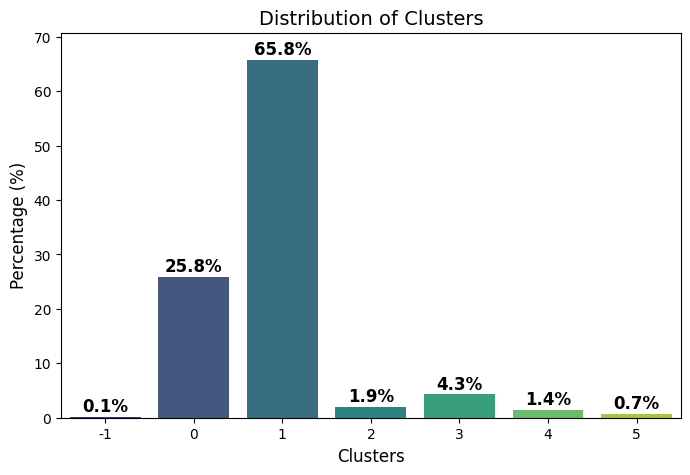

In [21]:
# Count occurrences of each cluster
cluster_counts = df['cluster'].value_counts(normalize=True) * 100  # In percentage
cluster_counts_sorted = cluster_counts.sort_index()  # Sort by index if necessary

# Create a bar plot
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=cluster_counts_sorted.index, y=cluster_counts_sorted.values, palette="viridis")

# Add percentages above the bars
for i, percentage in enumerate(cluster_counts_sorted.values):
    ax.text(i, percentage + 1, f"{percentage:.1f}%", ha='center', fontsize=12, fontweight='bold')

# Customize the plot
plt.xlabel("Clusters", fontsize=12)
plt.ylabel("Percentage (%)", fontsize=12)
plt.title("Distribution of Clusters", fontsize=14)
plt.ylim(0, max(cluster_counts_sorted.values) + 5)  # Adjust scale to display labels
plt.show()

Cluster 1, comprising approximately 65% of the data points, represents the most prevalent group of houses with similar characteristics. Smaller clusters, such as Cluster 5 which makes up only about 0.7%, likely represent niche groups or outliers. This distribution suggests that the majority of houses share common features, while a few distinct groups exhibit unique attributes.

Now, let's examine the characteristics of each cluster more closely by calculating descriptive statistics for the relevant features.


In [22]:
cluster_0 = df[df['cluster'] == 0]

# Calculate descriptive statistics for cluster 0
cluster_0.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,yr_renovated,lat,long,MORTGAGE30US,age,sqft_grade_interaction,cluster
count,1.063000e+03,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.0,1063.000000,1063.000000,1063.000000,1063.000000,1063.0,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.0
mean,3.912385e+05,3.104421,1.649577,1611.382879,10613.370649,1.072437,0.0,0.009407,2.962371,7.016933,1959.161806,0.0,47.565046,-122.252845,3.957883,64.838194,11585.346190,0.0
std,1.787274e+05,0.928422,0.606941,570.649486,11893.403954,0.205669,0.0,0.105881,0.209238,0.808206,24.979090,0.0,0.143254,0.112073,0.197898,24.979090,5013.010769,0.0
min,8.250000e+04,0.000000,0.500000,390.000000,1642.000000,1.000000,0.0,0.000000,1.000000,4.000000,1900.000000,0.0,47.192300,-122.509000,3.590000,10.000000,1560.000000,0.0
25%,2.550000e+05,3.000000,1.000000,1180.000000,6000.000000,1.000000,0.0,0.000000,3.000000,7.000000,1946.000000,0.0,47.476100,-122.337000,3.760000,46.000000,7910.000000,0.0
50%,3.585000e+05,3.000000,1.750000,1540.000000,7800.000000,1.000000,0.0,0.000000,3.000000,7.000000,1961.000000,0.0,47.573200,-122.288000,4.010000,63.000000,10920.000000,0.0
75%,4.850000e+05,4.000000,2.000000,1960.000000,10234.500000,1.000000,0.0,0.000000,3.000000,7.000000,1978.000000,0.0,47.691200,-122.180500,4.130000,78.000000,14480.000000,0.0
max,1.545000e+06,8.000000,4.500000,3800.000000,105415.000000,2.500000,0.0,2.000000,3.000000,10.000000,2014.000000,0.0,47.777400,-121.865000,4.230000,124.000000,36800.000000,0.0


Cluster 0: Affordable, Established Homes <br>
With an average price of $391,238, this cluster represents more affordable housing options. These properties tend to be smaller, averaging 1611 sqft of living space, with around 3 bedrooms and 1.65 bathrooms. Built around 1959, these properties are generally older and smaller in size compared to other clusters. They are likely situated in established neighborhoods where the cost of living is relatively lower.

In [23]:
cluster_1 = df[df['cluster'] == 1]

# Calculer les statistiques descriptives pour le cluster 1
cluster_1.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,yr_renovated,lat,long,MORTGAGE30US,age,sqft_grade_interaction,cluster
count,2.707000e+03,2707.000000,2707.000000,2707.000000,2707.000000,2707.000000,2707.0,2707.000000,2707.000000,2707.000000,2707.000000,2707.0,2707.000000,2707.000000,2707.000000,2707.000000,2707.000000,2707.0
mean,5.640284e+05,3.496860,2.267732,2233.246398,11315.224972,1.598264,0.0,0.271888,3.617658,7.830070,1976.041374,0.0,47.549444,-122.201325,3.970248,47.958626,18352.743258,1.0
std,3.548060e+05,0.904273,0.744938,926.127220,15709.155945,0.497355,0.0,0.794914,0.699825,1.209691,28.864194,0.0,0.138553,0.144156,0.198256,28.864194,10577.213060,0.0
min,1.000000e+05,0.000000,0.000000,470.000000,600.000000,1.000000,0.0,0.000000,2.000000,4.000000,1900.000000,0.0,47.164700,-122.497000,3.590000,9.000000,1880.000000,1.0
25%,3.335000e+05,3.000000,1.750000,1570.000000,5000.000000,1.000000,0.0,0.000000,3.000000,7.000000,1957.000000,0.0,47.450800,-122.318000,3.780000,23.000000,11235.000000,1.0
50%,4.700000e+05,3.000000,2.500000,2080.000000,7560.000000,2.000000,0.0,0.000000,3.000000,8.000000,1981.000000,0.0,47.562200,-122.210000,4.020000,43.000000,15820.000000,1.0
75%,6.850000e+05,4.000000,2.500000,2720.000000,10755.500000,2.000000,0.0,0.000000,4.000000,8.000000,2001.000000,0.0,47.665300,-122.113000,4.140000,67.000000,22830.000000,1.0
max,3.800000e+06,10.000000,6.000000,7850.000000,219542.000000,3.000000,0.0,4.000000,5.000000,13.000000,2015.000000,0.0,47.776700,-121.315000,4.230000,124.000000,94200.000000,1.0


Cluster 1: Mid-Range Family Homes <br>
Representing the largest segment of properties, this cluster has an average price of $564,028. These homes offer more space with an average of 2233 sqft, approximately 3.5 bedrooms, and 2.27 bathrooms making them suitable for families. Constructed around 1976, these properties offer a good balance between price and space and are relatively modern and well-maintained.

In [24]:
cluster_2 = df[df['cluster'] == 2]

# Calculer les statistiques descriptives pour le cluster 2
cluster_2.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,yr_renovated,lat,long,MORTGAGE30US,age,sqft_grade_interaction,cluster
count,8.000000e+01,80.000000,80.000000,80.000000,80.000000,80.00000,80.0,80.00000,80.0,80.000000,80.000000,80.0,80.000000,80.000000,80.000000,80.000000,80.000000,80.0
mean,4.832637e+05,2.712500,2.253125,1498.975000,1401.087500,3.02500,0.0,0.05000,3.0,7.900000,2006.362500,0.0,47.670220,-122.340912,3.952750,17.637500,11895.325000,2.0
std,1.657456e+05,0.659761,0.621978,364.893152,697.713285,0.10966,0.0,0.31422,0.0,0.586774,4.647699,0.0,0.044998,0.037255,0.205192,4.647699,3251.761847,0.0
min,2.750000e+05,0.000000,0.000000,988.000000,798.000000,3.00000,0.0,0.00000,3.0,7.000000,1990.000000,0.0,47.521200,-122.400000,3.590000,9.000000,6916.000000,2.0
25%,3.487500e+05,2.750000,2.000000,1277.500000,1022.000000,3.00000,0.0,0.00000,3.0,8.000000,2004.000000,0.0,47.653000,-122.362000,3.722500,15.000000,9760.000000,2.0
50%,4.575000e+05,3.000000,2.250000,1435.000000,1232.500000,3.00000,0.0,0.00000,3.0,8.000000,2007.000000,0.0,47.678850,-122.345000,3.985000,17.000000,11120.000000,2.0
75%,5.597500e+05,3.000000,2.500000,1592.500000,1475.250000,3.00000,0.0,0.00000,3.0,8.000000,2009.000000,0.0,47.698350,-122.317000,4.130000,20.000000,12980.000000,2.0
max,1.095000e+06,4.000000,3.500000,3064.000000,5000.000000,3.50000,0.0,2.00000,3.0,10.000000,2015.000000,0.0,47.733700,-122.200000,4.230000,34.000000,26010.000000,2.0


Cluster 2: Newer Urban Apartments/Townhouses <br>
This cluster consists of properties with an average price of $483,264. These tend to be smaller homes, averaging 1499 sqft, with around 2.7 bedrooms and 2.25 bathrooms. The defining characteristic is that they are newer, built around 2006, and have multiple floors, averaging 3.03. This suggests these are apartments or townhouses. This cluster represents a more recent trend in housing construction, catering to buyers looking for modern, compact living spaces.

In [25]:
cluster_3 = df[df['cluster'] == 3]

# Calculer les statistiques descriptives pour le cluster 3
cluster_3.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,yr_renovated,lat,long,MORTGAGE30US,age,sqft_grade_interaction,cluster
count,1.760000e+02,176.000000,176.000000,176.000000,176.000000,176.000000,176.0,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.0
mean,7.300645e+05,3.556818,2.282670,2240.653409,10013.039773,1.585227,0.0,0.437500,3.210227,7.772727,1939.318182,1996.073864,47.594250,-122.257869,3.986989,84.681818,18225.443182,3.0
std,4.654858e+05,1.119775,0.838365,964.014238,14546.022050,0.508340,0.0,0.954126,0.508340,1.187817,22.747833,15.570309,0.114301,0.147893,0.195733,22.747833,10162.731739,0.0
min,1.340000e+05,1.000000,0.750000,520.000000,1546.000000,1.000000,0.0,0.000000,2.000000,4.000000,1900.000000,1944.000000,47.208600,-122.411000,3.590000,26.000000,2080.000000,3.0
25%,3.987375e+05,3.000000,1.750000,1517.500000,4515.000000,1.000000,0.0,0.000000,3.000000,7.000000,1920.000000,1988.000000,47.546650,-122.356000,3.800000,69.000000,10910.000000,3.0
50%,6.137520e+05,3.000000,2.250000,2095.000000,6847.500000,1.500000,0.0,0.000000,3.000000,8.000000,1942.000000,2000.000000,47.618150,-122.293000,4.100000,82.000000,15970.000000,3.0
75%,9.137500e+05,4.000000,3.000000,2777.500000,9545.500000,2.000000,0.0,0.000000,3.000000,9.000000,1955.000000,2008.000000,47.667875,-122.213500,4.140000,104.000000,24150.000000,3.0
max,2.750000e+06,11.000000,4.500000,5530.000000,119790.000000,3.000000,0.0,4.000000,5.000000,11.000000,1998.000000,2015.000000,47.777000,-121.359000,4.230000,124.000000,55300.000000,3.0


Cluster 3: Renovated Older Homes <br>
With an average price of $730,064, this cluster includes higher-value properties. These homes offer around 2241 sqft of living space, approximately 3.6 bedrooms, and 2.28 bathrooms. This cluster includes higher-value properties that offer more living space and amenities. Despite being older (built around 1939), these homes have undergone significant renovations around 1996, which has likely contributed to their higher value. They are spacious and well-suited for larger families.

In [26]:
cluster_4 = df[df['cluster'] == 4]

# Calculer les statistiques descriptives pour le cluster 4
cluster_4.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,yr_renovated,lat,long,MORTGAGE30US,age,sqft_grade_interaction,cluster
count,5.800000e+01,58.000000,58.000000,58.000000,58.000000,58.000000,58.0,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.0
mean,6.396069e+05,3.241379,2.310345,2581.344828,278276.068966,1.655172,0.0,0.362069,3.293103,8.327586,1984.120690,68.637931,47.479791,-122.020086,3.982759,39.879310,22474.034483,4.0
std,2.790694e+05,0.801541,0.612928,899.722346,103627.140968,0.460805,0.0,0.930917,0.592604,1.329661,19.906869,366.373345,0.165116,0.148115,0.191731,19.906869,10912.588181,0.0
min,3.020000e+05,1.000000,1.000000,800.000000,150282.000000,1.000000,0.0,0.000000,2.000000,5.000000,1925.000000,0.000000,47.207900,-122.486000,3.650000,16.000000,4000.000000,4.0
25%,4.727500e+05,3.000000,1.750000,1837.500000,211156.750000,1.000000,0.0,0.000000,3.000000,7.000000,1976.250000,0.000000,47.369500,-122.061250,3.800000,25.250000,13527.500000,4.0
50%,5.657500e+05,3.000000,2.500000,2495.000000,226947.000000,2.000000,0.0,0.000000,3.000000,8.500000,1990.000000,0.000000,47.457450,-122.009500,4.060000,34.000000,21390.000000,4.0
75%,7.150000e+05,4.000000,2.500000,3267.500000,346084.000000,2.000000,0.0,0.000000,3.750000,9.000000,1998.750000,0.000000,47.624400,-121.947000,4.135000,47.750000,28902.500000,4.0
max,1.800000e+06,6.000000,4.250000,5290.000000,577605.000000,2.500000,0.0,3.000000,5.000000,11.000000,2008.000000,1999.000000,47.772000,-121.725000,4.230000,99.000000,58190.000000,4.0


Cluster 4: Large Properties with Extensive Land <br>
This cluster has properties with an average price of $639,607. These properties are spacious, averaging 2581 sqft, with 3.2 bedrooms and 2.31 bathrooms. Properties in this cluster are spacious and relatively new, built around 1984. They offer large lot sizes, averaging 278,276 sqft, indicating they may be located in suburban or less densely populated areas. These homes provide ample space both indoors and outdoors, making them attractive to families seeking a more private setting.

In [27]:
cluster_5 = df[df['cluster'] == 5]

# Calculer les statistiques descriptives pour le cluster 5
cluster_5.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,yr_renovated,lat,long,MORTGAGE30US,age,sqft_grade_interaction,cluster
count,2.900000e+01,29.000000,29.000000,29.000000,29.000000,29.000000,29.0,29.000000,29.00000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.0
mean,1.347445e+06,3.413793,2.681034,2957.413793,21706.206897,1.672414,1.0,3.793103,3.37931,8.551724,1971.241379,479.034483,47.524134,-122.293069,4.044483,52.758621,26794.655172,5.0
std,8.751684e+05,1.180715,0.893670,1324.169970,16037.297255,0.522287,0.0,0.412251,0.56149,1.660168,22.490721,864.306141,0.125045,0.122443,0.142392,22.490721,16403.746846,0.0
min,2.900000e+05,2.000000,0.750000,440.000000,1767.000000,1.000000,1.0,3.000000,3.00000,5.000000,1915.000000,0.000000,47.327600,-122.512000,3.660000,17.000000,2200.000000,5.0
25%,7.050000e+05,3.000000,2.250000,2070.000000,11774.000000,1.000000,1.0,4.000000,3.00000,7.000000,1956.000000,0.000000,47.448500,-122.376000,3.980000,35.000000,17730.000000,5.0
50%,1.100000e+06,3.000000,2.500000,2790.000000,17342.000000,2.000000,1.0,4.000000,3.00000,8.000000,1976.000000,0.000000,47.503300,-122.324000,4.120000,48.000000,22410.000000,5.0
75%,1.850000e+06,4.000000,3.250000,3370.000000,24691.000000,2.000000,1.0,4.000000,4.00000,9.000000,1989.000000,0.000000,47.592400,-122.241000,4.130000,68.000000,26910.000000,5.0
max,3.640900e+06,6.000000,4.750000,6200.000000,59612.000000,3.000000,1.0,4.000000,5.00000,12.000000,2007.000000,2003.000000,47.772900,-122.060000,4.230000,109.000000,68200.000000,5.0


Cluster 5: Luxury Waterfront Properties with Views <br>
Representing the high-end segment of the market, properties in this cluster have an average price of $1,347,445. They are larger, offering around 2957 sqft, approximately 3.4 bedrooms, and 2.68 bathrooms. They are typically located in prime locations with waterfront views, adding significantly to their value. Constructed around 1971, these properties have likely undergone extensive renovations to maintain their premium status.

## 4.5 Conclusion

The combination of UMAP for dimensionality reduction and DBSCAN for clustering has proven to be a powerful approach for analyzing the dataset. The identified clusters provide a clear segmentation of the properties based on various factors such as price, size, location, and condition. This segmentation can be leveraged for various purposes, including market analysis, investment strategies, and targeted marketing campaigns.

Moving forward, the next step will involve tuning the hyperparameters of DBSCAN to further optimize the clustering results. This will include exploring the impact of parameters like eps and min_samples on the performance and interpretation of the clusters.

# 5 Hyperparameter Impact

## 5.1 Exploring Hyperparameter Impact

In this section, we explore the critical process of hyperparameter tuning for the DBSCAN clustering algorithm, specifically within the context of our housing dataset. DBSCAN's ability to identify clusters of varying shapes and densities depends heavily on the appropriate selection of its hyperparameters. We focus on two key parameters: eps and min_samples.

### Key Hyperparameters

- eps (Epsilon): This parameter defines the maximum distance between two data points for one to be considered a neighbor of the other. In the context of our housing dataset, eps determines how "close" two houses need to be in feature space (e.g., price, size, location) to belong to the same neighborhood. Choosing an appropriate eps value is crucial for capturing the natural density structure of the data and forming meaningful clusters of similar houses.
- min_samples: This parameter specifies the minimum number of data points required within the eps radius for a point to be considered a "core point." For housing data, min_samples determines how many similar houses must exist in a given neighborhood for it to be considered a valid cluster. This parameter influences the robustness of the clustering process and helps distinguish between noise (outlier houses) and genuine clusters of similar properties.

### Importance of Hyperparameter Tuning
Selecting optimal values for eps and min_samples is essential for achieving meaningful and accurate clustering results that can be interpreted in the context of the housing market. Poorly chosen hyperparameters can lead to several issues:

- Over-Segmentation: Identifying too many clusters, potentially treating individual houses or very small groups as distinct market segments. This results in an overly granular and unhelpful view of the housing landscape.
- Under-Segmentation: Merging distinct clusters into a single group, failing to capture the true underlying structure of different housing types or neighborhoods. For example, grouping luxury waterfront properties with modest family homes.
- High Noise Ratio: Classifying a large portion of the data as noise, missing out on potential cluster formations. This could mean failing to identify valuable segments within the housing market, such as niche housing types or emerging trends.

### Impact of eps
A well-chosen eps value is essential for identifying natural groupings in the data:

- Smaller eps: Restricts the neighborhood size, requiring houses to be very similar to be grouped together. This can result in many houses being classified as noise (outliers) or the creation of very small, specific clusters. For instance, it might only identify clusters of identical houses in the same development.
- Larger eps: Expands the neighborhood size, allowing more houses to be grouped into clusters, even if they have some differences. While this can help capture broader patterns, it also increases the risk of merging distinct housing types or neighborhoods into a single, less informative cluster. For example, grouping suburban family homes and luxury condos into a single "residential" cluster.

### Impact of min_samples
The min_samples parameter influences the robustness of the clustering process and helps distinguish between noise and genuine clusters:

- Increasing min_samples: Makes it harder for data points to form clusters, requiring a higher density of similar houses in a given neighborhood. This results in fewer but denser clusters, as only regions with a high concentration of similar properties will meet the criteria. This approach is useful for identifying very stable and well-defined housing segments.
- Decreasing min_samples: Allows more data points to form clusters, as a lower density of similar houses is sufficient. This can lead to the formation of more clusters, potentially capturing noise as clusters, especially in regions with low data density. For example, identifying clusters based on just a few unique properties.

Understanding the impacts of eps and min_samples lays the groundwork for systematically optimizing these hyperparameters to achieve the most meaningful and interpretable clustering results. In the following sections, we will explore techniques such as Grid Search and Random Search to fine-tune these parameters and validate their effectiveness through performance metrics and qualitative analysis.

## 5.2 Visualizing Hyperparameter Impact 

In this section, we visualize the impact of the key hyperparameters (eps and min_samples) on the clustering results. By systematically varying these parameters, we can observe how they influence:
- The number of clusters identified.
- The number of noise points.
- The sizes and separations of clusters.

These visualizations will provide an intuitive understanding of how sensitive DBSCAN is to changes in eps and min_samples, helping us identify reasonable ranges for hyperparameter tuning.

### 5.2.1 Varying eps (Keeping min_samples Constant)

Here, we explore how changing eps affects the clustering results while keeping min_samples fixed. This will help us understand the role of eps in defining the neighborhood size and its impact on cluster formation.

Approach:
- Fix min_samples to a reasonable value (e.g., 5).
- Vary eps over a range of values (e.g., from 0.1 to 1.0 in increments of 0.1).
- For each eps value, apply DBSCAN and record: The number of clusters and The number of noise points.

Results for Varying eps (min_samples=5):


,eps,num_clusters,num_noise_points
0,0.1,178,1989
1,0.2,93,387
2,0.3,18,66
3,0.4,9,12
4,0.5,6,4
5,0.6,4,0
6,0.7,4,0
7,0.8,4,0
8,0.9,4,0
9,1.0,4,0


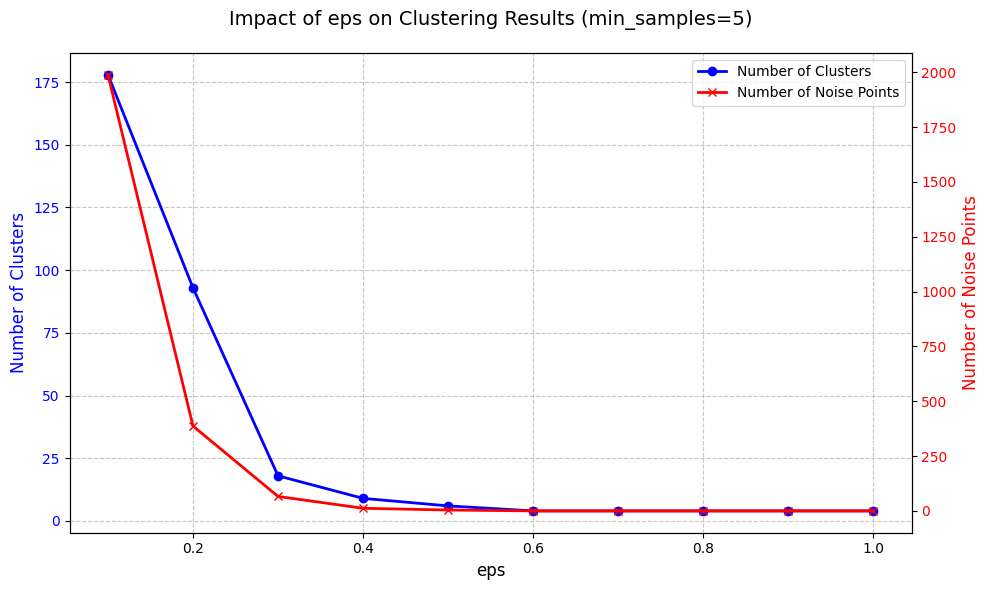

In [28]:
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
import pandas as pd

# Define the range of eps values
eps_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
min_samples = 5  # Fixed value

# Store results
results = []

# Run DBSCAN for each eps value
for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    clusters = dbscan.fit_predict(df_umap)
    
    # Count clusters and noise points
    num_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
    num_noise_points = list(clusters).count(-1)
    
    # Append results
    results.append({
        'eps': eps,
        'num_clusters': num_clusters,
        'num_noise_points': num_noise_points
    })

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Display the DataFrame
print("Results for Varying eps (min_samples=5):")
display(results_df)

# Plot the results
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot number of clusters
ax1.plot(results_df['eps'], results_df['num_clusters'], label="Number of Clusters", color="blue", marker="o", linestyle="-", linewidth=2)
ax1.set_xlabel("eps", fontsize=12)
ax1.set_ylabel("Number of Clusters", color="blue", fontsize=12)
ax1.tick_params(axis='y', labelcolor="blue")
ax1.grid(True, linestyle="--", alpha=0.7)

# Add secondary axis for noise points
ax2 = ax1.twinx()
ax2.plot(results_df['eps'], results_df['num_noise_points'], label="Number of Noise Points", color="red", marker="x", linestyle="-", linewidth=2)
ax2.set_ylabel("Number of Noise Points", color="red", fontsize=12)
ax2.tick_params(axis='y', labelcolor="red")

# Add title and legend
plt.title("Impact of eps on Clustering Results (min_samples=5)", fontsize=14, pad=20)

# Combine legends from both axes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc="upper right", fontsize=10)

# Adjust layout
fig.tight_layout()
plt.show()

Too small an eps leads to over-segmentation: many small clusters are created, and many points are classified as noise. This can make the results difficult to interpret. <br>
Too large an eps leads to under-segmentation: clusters become too large and can merge distinct groups, losing information about the underlying structure of the data. <br>
An optimal value of eps seems to be around 0.5 or 0.6, where the number of clusters is reasonable (4), and there are almost no noise points.

### 5.2.2 Varying min_samples (Keeping eps Constant)

Here, we explore how changing min_samples affects the clustering results while keeping eps fixed. This will help us understand the role of min_samples in defining cluster density and robustness.

Approach:
- Fix eps to a reasonable value (e.g., 0.5).
- Vary min_samples over a range of values (e.g., from 2 to 20 in increments of 2).
- For each min_samples value, apply DBSCAN and record: The number of clusters and The number of noise points.

Results for Varying min_samples (eps=0.5):


,min_samples,num_clusters,num_noise_points
0,2,7,1
1,4,6,4
2,6,8,4
3,8,8,4
4,10,8,4
5,12,9,12
6,14,9,14
7,16,10,14
8,18,10,18
9,20,11,21


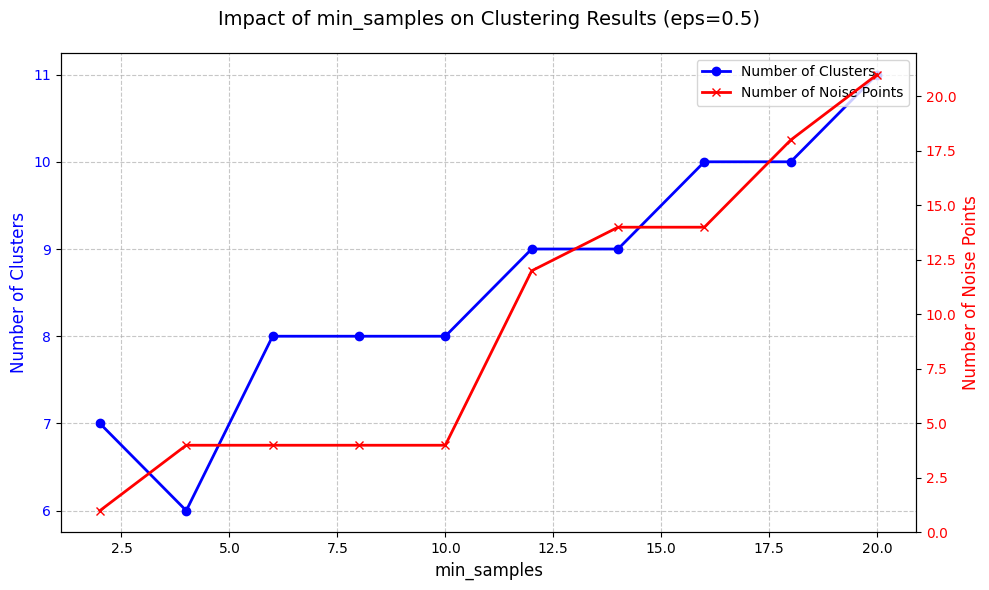

In [29]:
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
import pandas as pd

# Define the range of min_samples values
min_samples_values = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20]
eps = 0.5  # Fixed value

# Store results
results = []

# Run DBSCAN for each min_samples value
for min_samples in min_samples_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    clusters = dbscan.fit_predict(df_umap)
    
    # Count clusters and noise points
    num_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
    num_noise_points = list(clusters).count(-1)
    
    # Append results
    results.append({
        'min_samples': min_samples,
        'num_clusters': num_clusters,
        'num_noise_points': num_noise_points
    })

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Display the DataFrame
print("Results for Varying min_samples (eps=0.5):")
display(results_df)

# Plot the results
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot number of clusters
ax1.plot(results_df['min_samples'], results_df['num_clusters'], label="Number of Clusters", color="blue", marker="o", linestyle="-", linewidth=2)
ax1.set_xlabel("min_samples", fontsize=12)
ax1.set_ylabel("Number of Clusters", color="blue", fontsize=12)
ax1.tick_params(axis='y', labelcolor="blue")
ax1.grid(True, linestyle="--", alpha=0.7)

# Add secondary axis for noise points
ax2 = ax1.twinx()
ax2.plot(results_df['min_samples'], results_df['num_noise_points'], label="Number of Noise Points", color="red", marker="x", linestyle="-", linewidth=2)
ax2.set_ylabel("Number of Noise Points", color="red", fontsize=12)
ax2.tick_params(axis='y', labelcolor="red")

# Add title and legend
plt.title("Impact of min_samples on Clustering Results (eps=0.5)", fontsize=14, pad=20)

# Combine legends from both axes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc="upper right", fontsize=10)

# Adjust layout
fig.tight_layout()
plt.show()

A min_samples too small leads to less robust clusters, as they can be formed with very few points. This can lead to under-segmentation , where artificially large clusters are created. <br>
A min_samples too large leads to over-segmentation , as it becomes harder to form clusters, and many points are classified as noise. <br>
An optimal value of min_samples seems to be around 4 to 10, where the number of clusters is relatively stable (6 to 8), and the number of noise points remains moderate (4 to 12).

## 5.3 Conclusion

The exploration of hyperparameters in DBSCAN has provided valuable insights into their critical role in shaping clustering outcomes. By systematically analyzing the impact of `eps` and `min_samples`, we gained a deeper understanding of how these parameters influence the segmentation of our housing data. The choice of `eps` and `min_samples` directly affects the granularity and interpretability of the clusters, with smaller values leading to over-segmentation and larger values merging distinct clusters. Intermediate values of `eps` (around 0.5–0.6) and `min_samples` (between 4–10) strike a balance between meaningful segmentation and noise reduction.

Dimensionality reduction using UMAP significantly improved DBSCAN's ability to identify meaningful clusters by mitigating the "curse of dimensionality" and preserving local structures. This step was crucial, as applying DBSCAN directly to the raw data resulted in a high noise ratio and limited clustering. The resulting clusters correspond to distinct housing market segments, such as affordable homes, mid-range family properties, and luxury residences, demonstrating the practical utility of hyperparameter tuning.

This analysis underscores the importance of carefully selecting and tuning hyperparameters to achieve meaningful and interpretable clustering results. The insights gained here will serve as a solid foundation for the final project, where we will compare DBSCAN with other clustering algorithms and explore different hyperparameter optimization techniques to ensure a comprehensive evaluation of performance and interpretability.

# 6 Final Project: Comparison of Four Models

## 5.3 Hyperparameter Optimization

### 5.3.1 Grid Search

#### Explanation of Grid Search in the Context of Housing Data
Grid Search is an exhaustive search method that will help us find the optimal combination of DBSCAN parameters for clustering our housing data. It systematically evaluates all possible combinations of eps and min_samples within a specified range. For each combination, DBSCAN will cluster our housing data, and we'll evaluate the quality of these clusters using the Silhouette score.

#### Key benefits for our housing project:
- Exhaustive search ensures we don't miss any potentially optimal parameter combinations.
- Helps identify the best balance between cluster granularity and noise reduction in our housing segments.
- Provides insights into how sensitive our housing clusters are to parameter changes.

#### Define the Hyperparameter Grid for Housing Data
Based on our earlier exploration (Section 5.2), we observed that:
- eps values around 0.5–0.6 yielded reasonable housing segments. Lower values led to over-segmentation (too many small clusters), while higher values merged distinct housing types.
- min_samples values between 4–10 provided a good balance between cluster size and noise classification. This range helped distinguish between genuine housing segments and outlier properties.

Let's define our grid as follows:

In [45]:
param_grid = {
    'eps': [0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7],
    'min_samples': [4, 5, 6, 7, 8, 9, 10]
}

This grid will test 49 combinations of hyperparameters, each potentially revealing different patterns in our housing data.

#### Evaluation Metric: Silhouette Score for Housing Clusters
For our housing clusters, the Silhouette score will measure how well-defined and separated our housing segments are. It ranges from -1 to 1:
- A score close to 1 indicates well-defined housing segments with clear distinctions between different types of properties.
- A score around 0 suggests overlapping housing segments, where the boundaries between different property types are less clear.
- Negative scores would indicate poor clustering, where properties might be assigned to the wrong market segment.

#### Implementation of Grid Search for Housing Data Clustering

This code will iterate through all combinations of eps and min_samples in our defined grid, applying DBSCAN to our housing data and calculating the Silhouette score for each combination.

In [46]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.model_selection import ParameterGrid
import numpy as np

# Initialize variables to store best results
best_score = -1
best_params = None
results = []

# Perform Grid Search
for params in ParameterGrid(param_grid):
    dbscan = DBSCAN(**params)
    labels = dbscan.fit_predict(df_umap)
    
    # Calculate Silhouette score (ignoring noise points)
    if len(set(labels)) > 1:  # Ensure more than one housing segment
        non_noise_mask = labels != -1
        score = silhouette_score(df_umap[non_noise_mask], labels[non_noise_mask], metric='euclidean')
        
        num_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        noise_ratio = np.sum(labels == -1) / len(labels)
        
        results.append({**params, 'silhouette_score': score, 'num_clusters': num_clusters, 'noise_ratio': noise_ratio})
        
        if score > best_score:
            best_score = score
            best_params = params

print("Best parameters for housing segmentation:", best_params)
print("Best Silhouette score:", best_score)

# Convert results to DataFrame for easy analysis
import pandas as pd
results_df = pd.DataFrame(results)
display(results_df.sort_values('silhouette_score', ascending=False))


Best parameters for housing segmentation: {'eps': 0.55, 'min_samples': 6}
Best Silhouette score: 0.48450553


,eps,min_samples,silhouette_score,num_clusters,noise_ratio
23,0.55,6,0.484506,7,0.000486
24,0.55,7,0.484506,7,0.000486
25,0.55,8,0.484506,7,0.000486
11,0.45,8,0.435853,8,0.002429
8,0.45,5,0.435659,8,0.001700
10,0.45,7,0.435616,8,0.002186
9,0.45,6,0.435616,8,0.002186
20,0.50,10,0.435504,8,0.000972
7,0.45,4,0.435468,8,0.001457
16,0.50,6,0.435043,8,0.000972


To better understand and interpret the results of our grid search, let's visualize these data as a heatmap. This representation will provide a clearer view of how different hyperparameter combinations affect the quality of our housing clusters.

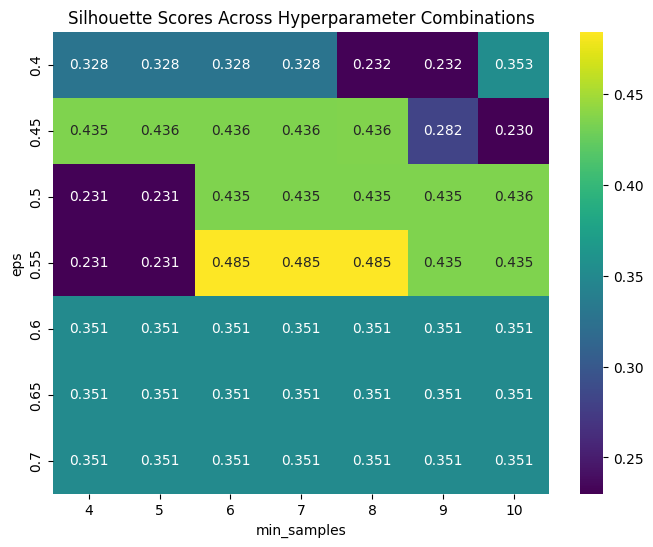

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Heatmap of Silhouette scores
pivot = results_df.pivot(index='eps', columns='min_samples', values='silhouette_score')
plt.figure(figsize=(8, 6))
sns.heatmap(pivot, annot=True, cmap='viridis', fmt=".3f")
plt.title('Silhouette Scores Across Hyperparameter Combinations')
plt.show()

#### Analysis of Grid Search Results
The Grid Search results indicate that the optimal combination of hyperparameters for our DBSCAN clustering is eps=0.55 and min_samples=6, yielding a Silhouette score of 0.48450553. This combination consistently produces 7 clusters across min_samples values of 6, 7, and 8, suggesting stable housing segments.

The choice of eps=0.55 strikes a balance between creating too many small clusters (which happens with lower eps values like 0.4-0.45) and too few broad clusters (which occurs with higher eps values like 0.6-0.7). The latter results in fewer clusters but with a lower Silhouette score, indicating less distinct separation between housing segments.

The low noise ratio (0.000486) for the optimal combination means that almost all properties are assigned to a cluster, which is beneficial for comprehensive market segmentation.

#### Interpretation for Housing Market Segmentation
Our housing market can be effectively segmented into 7 distinct categories using the optimal parameters. These segments are well-defined and comprehensive, providing a good balance between overly broad categorization and potentially over-specific segmentation. The high Silhouette score suggests clear separation between these segments, making it easier to identify distinguishing features of each housing category.

#### Implications for Analysis
With 7 well-defined segments, we have a solid foundation for analyzing different types of properties in our market. Each segment likely represents a distinct category of housing, such as luxury apartments, suburban family homes, or urban condos, which can be further characterized and analyzed. The stability of these segments across different min_samples values suggests that they are inherent to the data, not artifacts of parameter choice.

### 5.3.2 Random Search

#### Explanation of Random Search in the Context of Housing Data
Random Search is a probabilistic method for hyperparameter optimization that will help us find an effective combination of DBSCAN parameters for clustering our housing data. Unlike Grid Search, it randomly samples parameter combinations from a specified distribution. For each sampled combination, DBSCAN will cluster our housing data, and we'll evaluate the quality of these clusters using the Silhouette score.

#### Key benefits for our housing project:
- Efficient exploration of a larger parameter space, potentially discovering good configurations that a grid search might miss.
- Can be more time-efficient than Grid Search, especially with high-dimensional parameter spaces.
- Provides insights into the overall landscape of parameter effectiveness for our housing clusters.

#### Define the Hyperparameter Distribution for Housing Data
Based on our earlier exploration and Grid Search results, we'll define distributions around the promising areas:
- eps values will be sampled from a uniform distribution between 0.4 and 0.7, covering the range where we found good results.
- min_samples values will be integers sampled between 4 and 10, consistent with our previous findings on cluster stability and noise reduction.

Let's define our parameter distributions as follows:

In [56]:
from scipy.stats import uniform, randint
param_distributions = {
    'eps': uniform(0.4, 0.3),  # Uniform distribution between 0.4 and 0.7
    'min_samples': randint(4, 11)  # Integer values between 4 and 10
}

We'll sample 50 combinations from these distributions, each potentially revealing different patterns in our housing data.

#### Evaluation Metric: Silhouette Score for Housing Clusters
We'll use the same Silhouette score metric as in Grid Search:
- A score close to 1 indicates well-defined housing segments with clear distinctions between different types of properties.
- A score around 0 suggests overlapping housing segments, where the boundaries between different property types are less clear.
- Negative scores would indicate poor clustering, where properties might be assigned to the wrong market segment.

#### Implementation of Random Search for Housing Data Clustering
This code will randomly sample combinations of eps and min_samples from our defined distributions, applying DBSCAN to our housing data and calculating the Silhouette score for each combination.

Best parameters for housing segmentation: {'eps': np.float64(0.5352128686372524), 'min_samples': 6}
Best Silhouette score: 0.48450664


,eps,min_samples,silhouette_score,num_clusters,noise_ratio
1,0.535213,6,0.484507,7,0.000729
27,0.455663,8,0.435732,8,0.001943
32,0.428064,5,0.435687,8,0.001943
15,0.433677,5,0.435687,8,0.001943
46,0.444638,5,0.435659,8,0.001700
22,0.451451,5,0.435659,8,0.001700
9,0.435236,6,0.435616,8,0.002186
47,0.477468,8,0.435537,8,0.001457
37,0.463536,5,0.435509,8,0.001214
16,0.483994,4,0.435509,8,0.001214


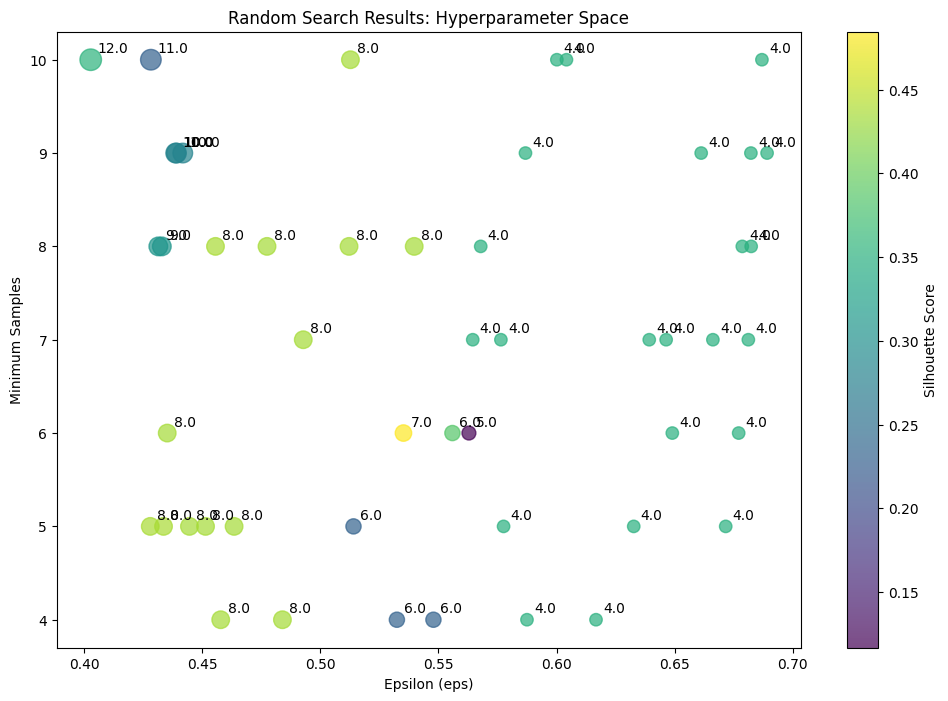

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Define the parameter space
param_distributions = {
    'eps': uniform(0.4, 0.3),  # Uniform distribution between 0.4 and 0.7
    'min_samples': randint(4, 11)  # Integer values between 4 and 10
}

# Number of iterations for Random Search
n_iter = 50

# Initialize variables to store best results
best_score = -1
best_params = None
results = []

# Perform Random Search
for _ in range(n_iter):
    # Sample parameters
    eps = param_distributions['eps'].rvs()
    min_samples = param_distributions['min_samples'].rvs()
    
    # Create and fit DBSCAN
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(df_umap)
    
    # Calculate Silhouette score (ignoring noise points)
    if len(set(labels)) > 1:  # Ensure more than one housing segment
        non_noise_mask = labels != -1
        score = silhouette_score(df_umap[non_noise_mask], labels[non_noise_mask], metric='euclidean')
        
        num_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        noise_ratio = np.sum(labels == -1) / len(labels)
        
        results.append({'eps': eps, 'min_samples': min_samples, 'silhouette_score': score, 
                        'num_clusters': num_clusters, 'noise_ratio': noise_ratio})
        
        if score > best_score:
            best_score = score
            best_params = {'eps': eps, 'min_samples': min_samples}

print("Best parameters for housing segmentation:", best_params)
print("Best Silhouette score:", best_score)

# Convert results to DataFrame for easy analysis
import pandas as pd
results_df = pd.DataFrame(results)
display(results_df.sort_values('silhouette_score', ascending=False).head(10))

# Visualize the results
plt.figure(figsize=(12, 8))
scatter = plt.scatter(results_df['eps'], results_df['min_samples'], 
                      c=results_df['silhouette_score'], s=results_df['num_clusters']*20,
                      cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='Silhouette Score')
plt.xlabel('Epsilon (eps)')
plt.ylabel('Minimum Samples')
plt.title('Random Search Results: Hyperparameter Space')
for i, row in results_df.iterrows():
    plt.annotate(f"{row['num_clusters']}", 
                 (row['eps'], row['min_samples']),
                 xytext=(5, 5), textcoords='offset points')
plt.show()

#### Analysis of Random Search Results
The Random Search results corroborate and refine our findings from the Grid Search. The optimal combination of hyperparameters for our DBSCAN clustering is eps ≈ 0.535 and min_samples = 6, yielding a Silhouette score of 0.484507. This combination produces 7 clusters, which aligns closely with our Grid Search results (eps = 0.55, min_samples = 6). This consistency across different search methods reinforces the robustness of these parameters for our housing data clustering. <br>
The low noise ratio (0.000729) for the optimal combination indicates that almost all properties are assigned to a cluster, supporting comprehensive market segmentation.

#### Interpretation for Housing Market Segmentation
Our housing market can be effectively segmented into 7 distinct categories using the optimal parameters. These segments are well-defined and comprehensive, as evidenced by the high Silhouette score. The Random Search has helped us fine-tune the eps value, potentially leading to slightly better-defined clusters compared to the Grid Search results.<br>
The consistency in finding 7 clusters across multiple parameter combinations (as seen in the top results) suggests that this is a stable and meaningful segmentation of our housing market.

#### Implications for Analysis
The Random Search results reinforce our findings from the Grid Search while providing a more precise eps value. This refinement may lead to marginally better-defined housing segments.<br>
With 7 well-defined segments, we have a solid foundation for analyzing different types of properties in our market. Each segment likely represents a distinct category of housing, such as luxury apartments, suburban family homes, or urban condos.<br>
The stability of these segments across different search methods and parameter combinations suggests that they are inherent to the data, not artifacts of our search methodology. This gives us confidence in the reliability of our market segmentation.

## 5.4 Comparing Results and Performance

### 5.4.1 Performance Metrics

### 5.4.2 Qualitative Analysis:

## 5.5 Sensitivity Analysis

## 5.6 Final Clustering Results

## 5.7 Discussion and Conclusion